In [1]:
import numpy as np
import matplotlib.pylab as plt
from math import *
#from sklearn.models import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn import svm
import pandas as pd
import seaborn as sns
from pylab import rcParams
from matplotlib import rc
from mpl_toolkits.mplot3d import Axes3D
import time
%matplotlib notebook

In [2]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
RANDOM_SEED = 42
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ['#01BEFE', '#FFDD00', '#FF7D00', '#FF006D', '#ADFF02', '#8F00FF']
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
# rcParams['figure.figsize'] = 12, 8


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae 
from sklearn.metrics import mean_absolute_percentage_error as mape 
from sklearn.metrics import r2_score as r2 
from sklearn.metrics import explained_variance_score as evs 

In [5]:
def rmse(y_pred, y_true):
    return np.sqrt(mse(y_pred, y_true))

In [6]:
def CC(y_pred, y_true):
    return np.corrcoef(y_pred, y_true)[0][1]

In [7]:
import pickle

#### April Dataset

In [8]:
df = pd.read_csv('inputs/DS1_1440.csv')

In [9]:
from processing import create_features, split_data

In [10]:
train_len = int(.6*df.shape[0])
train_data, val_data, test_data = split_data(df.wind_speed.values, train_len)

In [11]:
from lssvm import LSSVMRegression as LSSVM

In [16]:
def get_data(file_name):
    file = open(file_name, 'rb')
    data = pickle.load(file)
    file.close()
    return data

In [13]:
svmd_ebqpso_1 = get_data('svmd_ebqpso_1')

In [14]:
error_values = get_data('error_svmd_eb_lssvm_1')

In [15]:
test_preds = []

#### Get Predicted Values

##### LSSVM-EBQPSO Model

In [16]:
lssvm_ebqpso_1 = get_data('lssvm_ebqpso_1')

In [17]:
lssvm_ebqpso_1['params'][-1]

1.0

In [18]:
params = lssvm_ebqpso_1['params']
train_data_, _, test_data_ = split_data(df.wind_speed.values, train_len)
x_train_, y_train_ = create_features(train_data_, int(params[-1]))
x_test_, y_test_ = create_features(test_data_, int(params[-1]))
reg = LSSVM(gamma=params[0], sigma=params[1])
reg.fit(x_train_, y_train_)
lssvm_ebqpso_preds_1 = reg.predict(x_test_)

##### SVMD-LSSVM-EBQPSO Model

In [19]:
svmds = pd.read_csv('inputs/SVMD_1.csv')

In [20]:
for i in range(len(svmd_ebqpso_1)):
    params = svmd_ebqpso_1[i][0]
    train_data_i, _, test_data_i = split_data(svmds.iloc[:, i].values, train_len)
    x_train_i, y_train_i = create_features(train_data_i, params[-1])
    x_test_i, y_test_i = create_features(test_data_i, params[-1])
    reg = LSSVM(gamma=params[0], sigma=params[1])
    reg.fit(x_train_i, y_train_i)
    test_preds.append(reg.predict(x_test_i))

In [21]:
# Get the optimum values of window sizes for each modes
window_sizes = np.array([svmd_ebqpso_1[i][0][-1] for i in svmd_ebqpso_1.keys()])

In [22]:
max_window_size = np.max(window_sizes)

In [23]:
adjusted_test_preds = np.array([
    list(test_preds[i][(max_window_size-window_sizes[i]):]) for i in range(len(window_sizes))
])

In [24]:
total_modes_preds = adjusted_test_preds.sum(axis=0)

In [25]:
total_modes_preds.shape

(276,)

In [26]:
error_values_1 = error_values[max_window_size-5:]

In [27]:
svmd_ebqpso_lssvm_preds = total_modes_preds + error_values_1

In [28]:
svmd_ebqpso_lssvm_preds.shape

(276,)

In [12]:
max_window_size = 12

In [13]:
_, y_test = create_features(test_data, max_window_size)

In [30]:
mae(y_test, svmd_ebqpso_lssvm_preds)

0.512030131411579

In [31]:
lssvm_ebqpso_preds_1 = lssvm_ebqpso_preds_1[max_window_size-1:]

##### CNN Model

In [32]:
cnn_preds = get_data('pred_cnn_1')

In [33]:
len(cnn_preds)

283

In [34]:
cnn_preds_1 = cnn_preds[max_window_size-5:]

In [35]:
len(cnn_preds_1)

276

In [36]:
mse(y_test, cnn_preds_1)

0.6280094185605536

##### SVMD-CNN Model

In [37]:
svmd_cnn_1 = get_data('svmd_cnn_1')

In [38]:
svmd_cnn_1 = svmd_cnn_1[max_window_size-5:]

In [39]:
len(svmd_cnn_1)

276

In [40]:
mse(svmd_cnn_1, y_test)

0.5184969024484706

##### LSTM Model

In [41]:
lstm_preds_1 = get_data('lstm_1')

In [42]:
lstm_preds_1 = lstm_preds_1[max_window_size-5:]

In [43]:
len(lstm_preds_1)

276

In [44]:
mse(lstm_preds_1, y_test)

0.6201403822668996

##### SVMD-LSTM Model

In [45]:
svmd_lstm_1 = get_data('svmd_lstm_1')

In [46]:
svmd_lstm_1 = svmd_lstm_1[max_window_size-5:]

In [47]:
len(svmd_lstm_1)

276

In [48]:
mse(svmd_lstm_1, y_test)

0.6140267058798828

##### CNN-LSTM Model

In [49]:
cnn_lstm_1 = get_data('cnn_lstm_1')

In [50]:
cnn_lstm_1 = cnn_lstm_1[max_window_size-5:]

In [51]:
len(cnn_lstm_1)

276

In [52]:
mse(cnn_lstm_1, y_test)

0.6552313425621665

##### SVMD-CNN-LSTM Model

In [53]:
svmd_cnn_lstm_1 = get_data('svmd_cnnlstm_1')

In [54]:
len(svmd_cnn_lstm_1)

283

In [55]:
svmd_cnn_lstm_1 = svmd_cnn_lstm_1[max_window_size-5:]

In [56]:
len(svmd_cnn_lstm_1)

276

In [57]:
mse(svmd_cnn_lstm_1, y_test)

0.8858038983398463

In [58]:
models = ['LSSVM-EBQPSO', 'Proposed', 'CNN', 'SVMD-CNN', 'LSTM', 'SVMD-LSTM', 'CNN-LSTM', 'SVMD-CNN-LSTM']
predicted_values = [
    lssvm_ebqpso_preds_1,
    svmd_ebqpso_lssvm_preds, 
    cnn_preds_1, 
    svmd_cnn_1, 
    lstm_preds_1, 
    svmd_lstm_1, 
    cnn_lstm_1,
    svmd_cnn_lstm_1 
]

In [59]:
def summarize_results(models, predicted_values):
    print("Model".rjust(25), "\t RMSE \t MAE \t MAPE \t R2 \t  CC \t EVS")
    print("---------".rjust(25), "\t ---- \t ---- \t ---- \t ---- \t ---- \t ----")
    for i in range(len(models)):
        print(
            models[i].rjust(25), '\t', 
            round(rmse(y_test, predicted_values[i]), 3), '\t', 
            round(mae(y_test, predicted_values[i]), 3),  '\t',
            round(mape(y_test, predicted_values[i]), 3), '\t',
            round(r2(y_test, predicted_values[i]), 3),   '\t',
            round(CC(y_test, predicted_values[i]), 3),  '\t',
            round(evs(y_test, predicted_values[i]), 3),  '\t'
        )

In [60]:
summarize_results(models, predicted_values)

                    Model 	 RMSE 	 MAE 	 MAPE 	 R2 	  CC 	 EVS
                --------- 	 ---- 	 ---- 	 ---- 	 ---- 	 ---- 	 ----
             LSSVM-EBQPSO 	 0.785 	 0.572 	 0.066 	 0.746 	 0.865 	 0.746 	
                 Proposed 	 0.703 	 0.512 	 0.059 	 0.796 	 0.892 	 0.796 	
                      CNN 	 0.792 	 0.578 	 0.066 	 0.741 	 0.864 	 0.744 	
                 SVMD-CNN 	 0.72 	 0.533 	 0.061 	 0.786 	 0.892 	 0.795 	
                     LSTM 	 0.787 	 0.581 	 0.067 	 0.744 	 0.864 	 0.747 	
                SVMD-LSTM 	 0.784 	 0.605 	 0.067 	 0.747 	 0.89 	 0.79 	
                 CNN-LSTM 	 0.809 	 0.599 	 0.068 	 0.73 	 0.862 	 0.742 	
            SVMD-CNN-LSTM 	 0.941 	 0.762 	 0.083 	 0.635 	 0.881 	 0.773 	


In [26]:
colors = ['#18a1cd', '#009076', '#fa8c00', '#857622', '#a65628', '#c24c39', '#5c5a30', '#4daf4a']

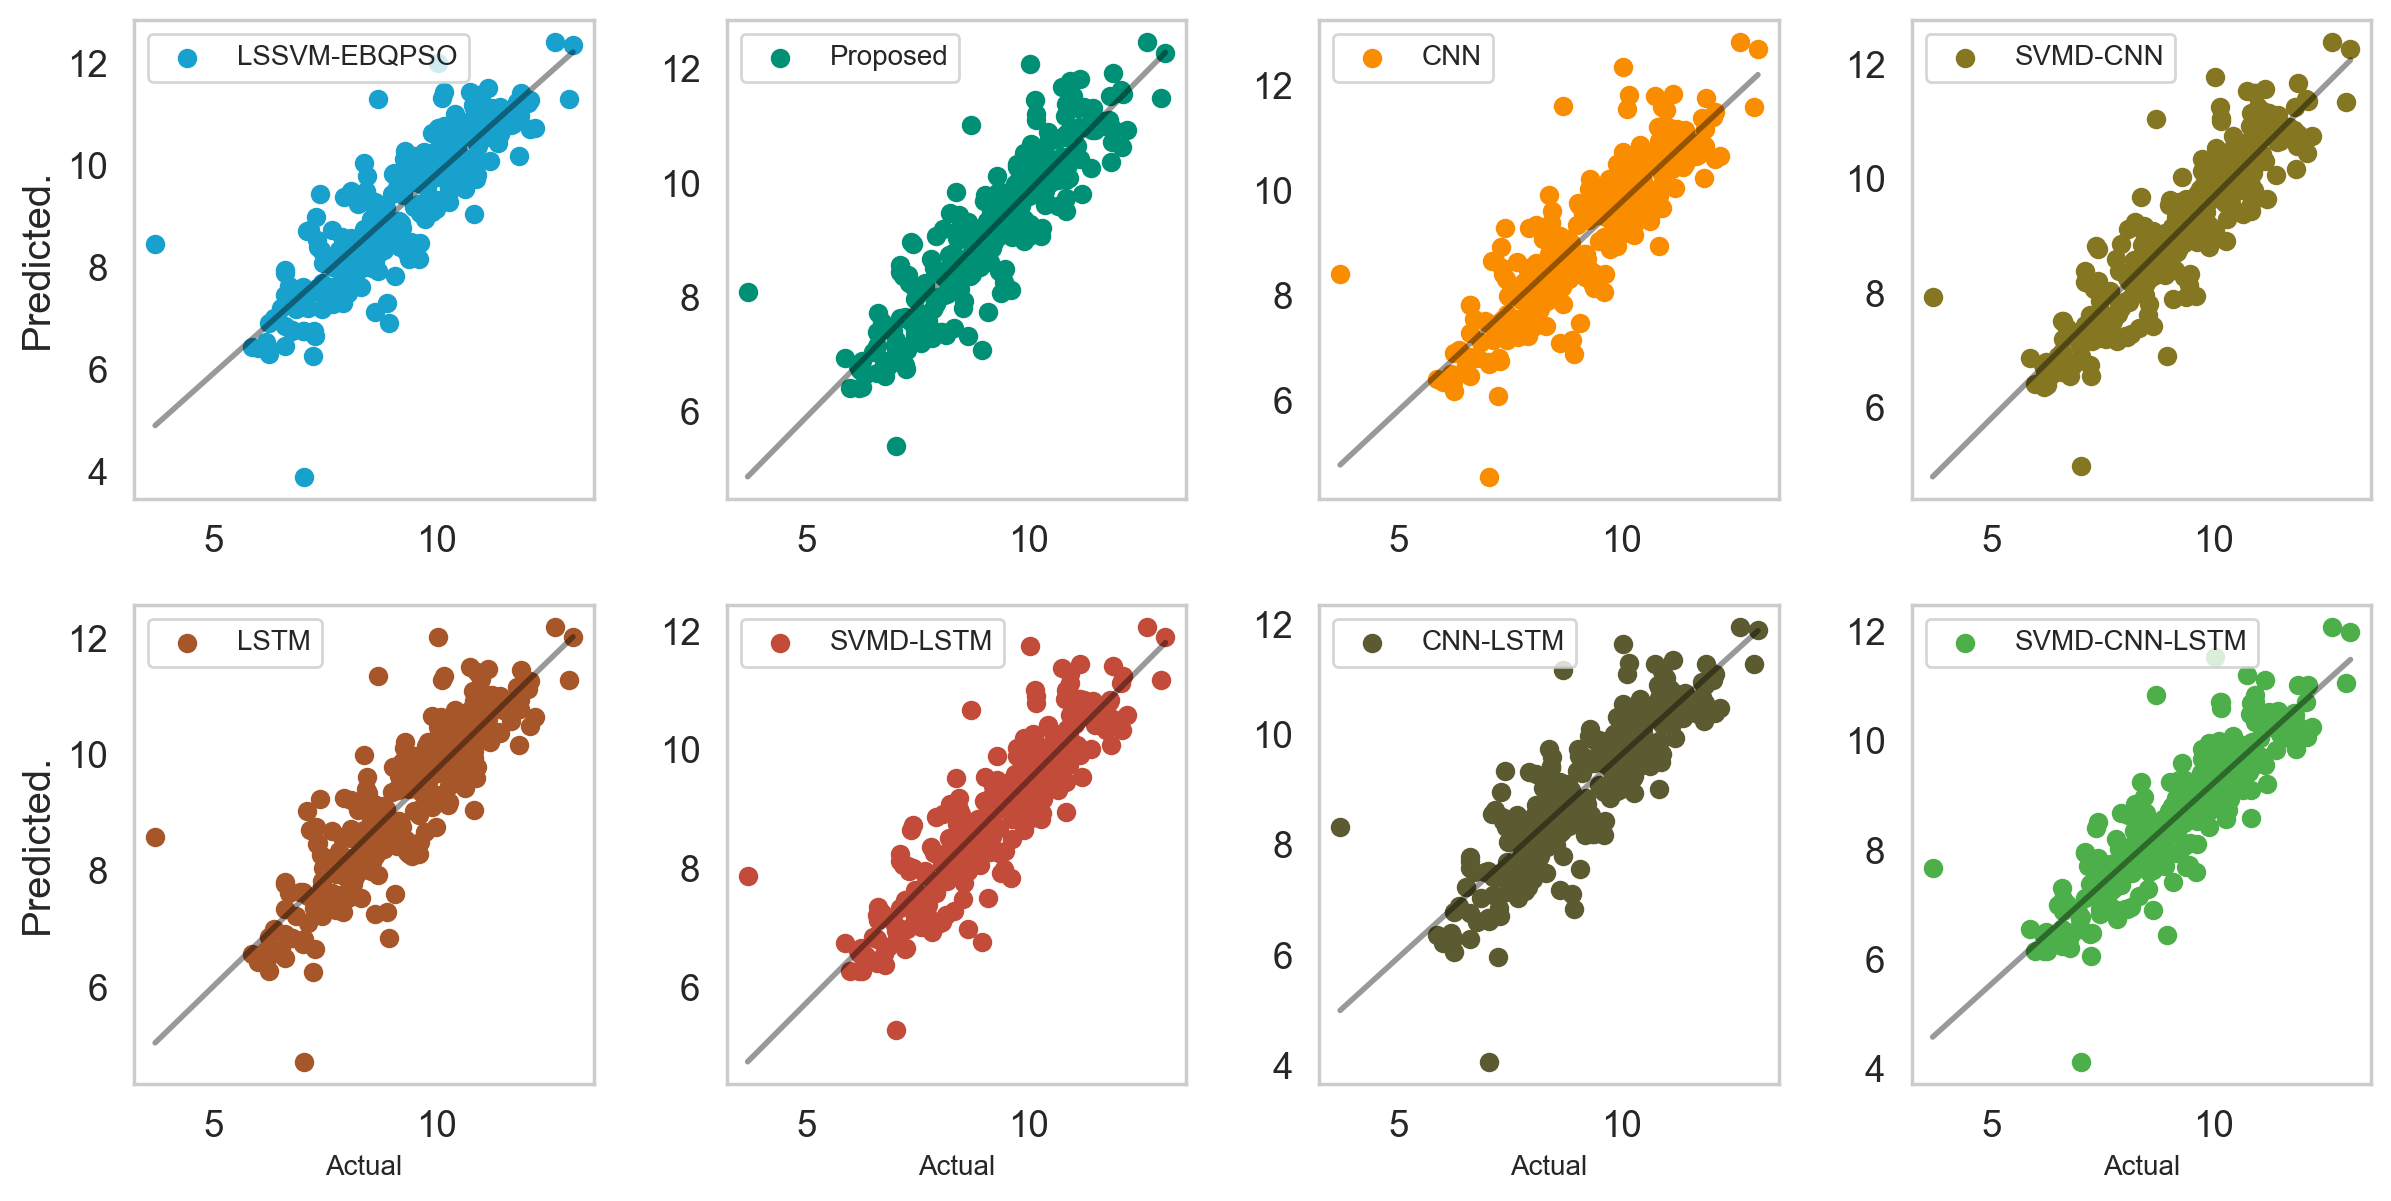

In [62]:
plt.rcParams["font.size"] = 10
fig, axes = plt.subplots(nrows=2, ncols=4,figsize=(12, 6))
plt.subplots_adjust(left=None, bottom=.1, right=None, top=.9, wspace=.2, hspace=.2)
# fig.delaxes(axes[-1][-1])
fig.tight_layout()
# fig.delaxes(axes[-1][-2])

for i in range(len(models)):
    row = i // 4
    col = i % 4
    axes[row][col].scatter(y_test, predicted_values[i], color = colors[i], label=models[i])
    
    m, b = np.polyfit(y_test, predicted_values[i], deg=1)

    # Create sequence of 100 numbers from 0 to 100 
    xseq = np.linspace(min(y_test), max(y_test), num=len(y_test))

    # Plot regression line
    axes[row][col].plot(xseq, b + m * xseq, color="black", lw=2, alpha=.4)

    # axes[row][col].set_title(models[i], fontsize=10)
    if i > 3:
        axes[row][col].set_xlabel('Actual', fontsize=10)
    

    axes[row][col].grid(False)
    if col == 0:
        plt.setp(axes[row, 0], ylabel='Predicted.')
    if row == -1:
        plt.setp(axes[-1, col], xlabel='Actual')
    axes[row][col].legend(fontsize=10)
# plt.axis('equal')
plt.savefig('figures/ds1_linear_fit.png', dpi=300)

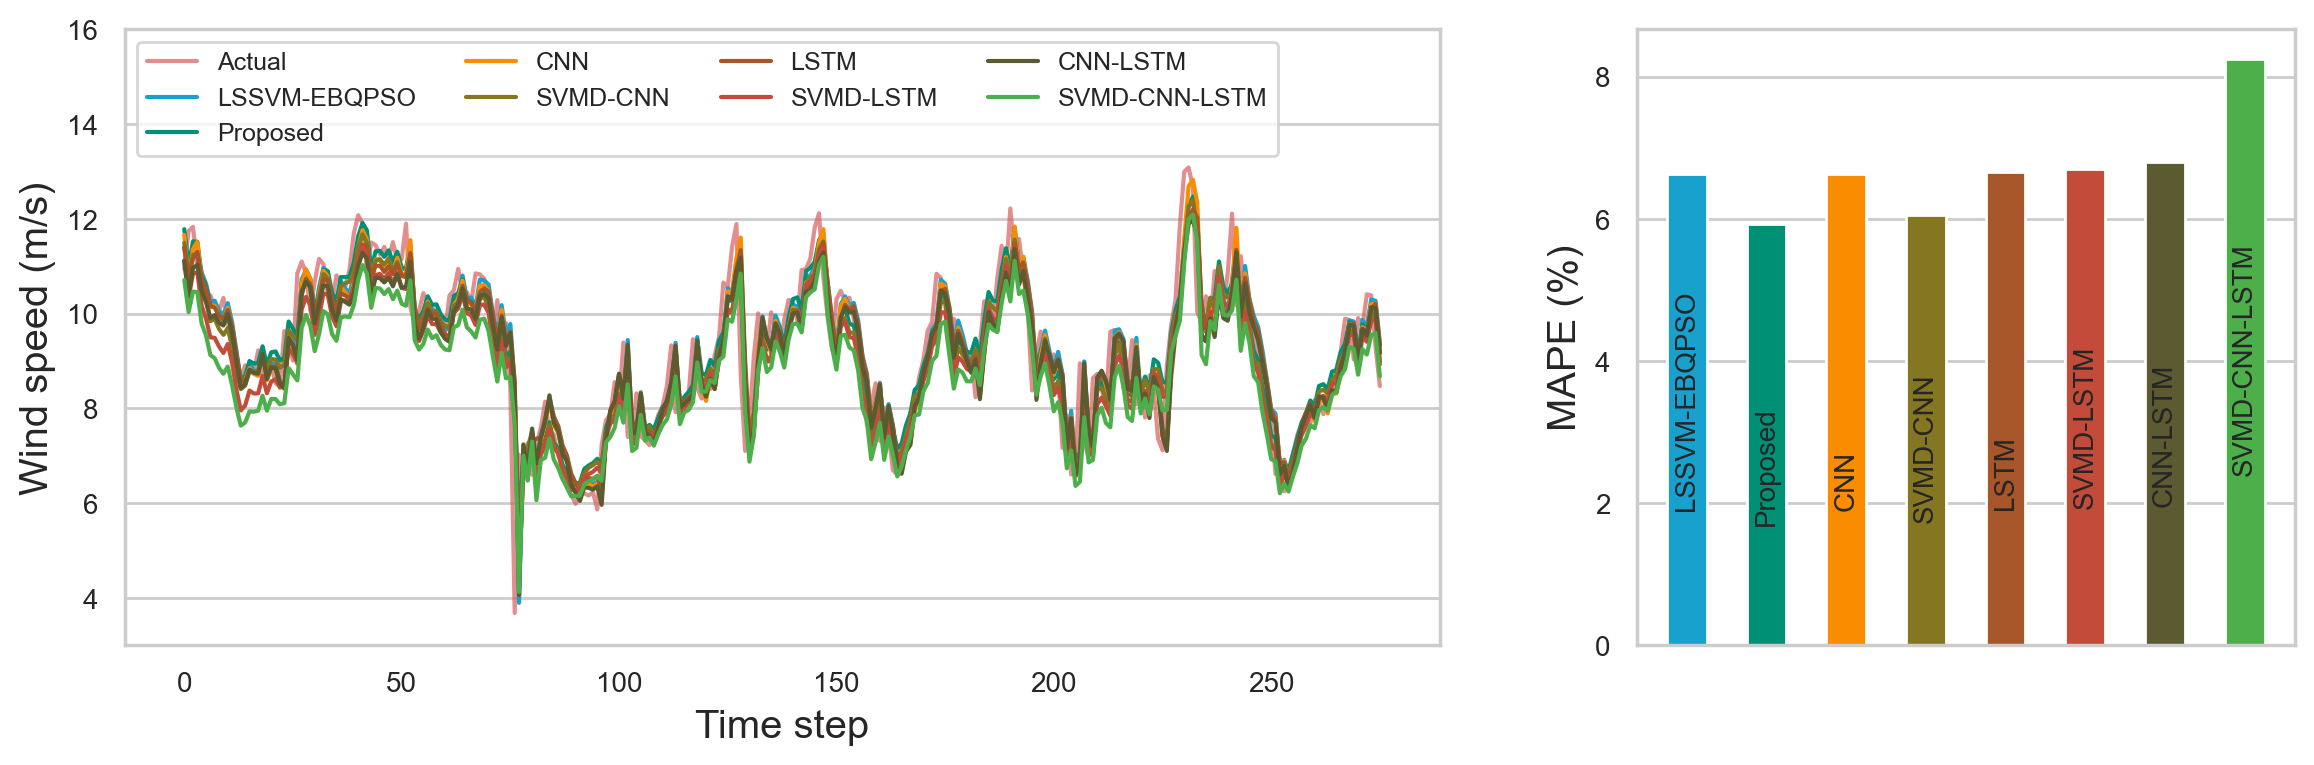

In [63]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 4), gridspec_kw={'width_ratios': [4, 2]})

for a in ax:
    for label in (a.get_xticklabels() + a.get_yticklabels()):
	    label.set_fontsize(10)
        
ax[0].plot(range(len(y_test)), y_test, color='r', alpha = .7, label='Actual')
for i, data in enumerate(predicted_values):
    ax[0].plot(range(len(y_test)), data, color=colors[i], label = models[i])
    

ax[0].grid(axis='x')
ax[0].legend(ncol=4, loc='upper left', fontsize=9)
ax[0].set_xlabel('Time step')
ax[0].set_ylim([3, 16])
ax[0].set_ylabel('Wind speed (m/s)')

ax[1].bar(range(len(models)), [mape(y_test, data)*100 for data in predicted_values], color=colors, width=.5)
ax[1].set_ylabel('MAPE (%)')
ax[1].xaxis.set_visible(False)
ax[1].grid(axis='x')
for i in range(len(models)):
    ax[1].text(i, (mape(y_test, predicted_values[i])*30), models[i], ha='center', rotation=90, fontsize=10)
plt.savefig('figures/ds1_forecast_figs.png', dpi=300)


In [64]:
import matplotlib as mpl
from scipy.stats import norm


def plot_error_hist(errors, colrs, d=100):
    bins=25
    fig, axs = plt.subplots(2, 4, figsize=(12, 6), dpi=d)
    fig.tight_layout()
    mpl.rcParams['xtick.labelsize'] = 10 
    mpl.rcParams['ytick.labelsize'] = 10 
    
    # fig.delaxes(axs[-1][-1])
    # fig.delaxes(axs[-1][-2])
    
    # for ax in axs:
    #     for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	#         label.set_fontsize(10)
        
    for i in range(len(models)):
        mu, std = norm.fit(errors[i])

        # for j in range(2):
        row = i // 4
        col = i % 4
        axs[row][col].hist(errors[i], bins=bins, density = True, color=colrs[i], label=models[i])
        # axs[row][col].legend()
        xmin, xmax = axs[row][col].get_xlim()
        x = np.linspace(xmin, xmax, len(errors[i]))
        p = norm.pdf(x, mu, std)
        axs[row][col].plot(x, p, 'k', linestyle = 'dashed', linewidth=2, alpha=.6)

        axs[row][col].legend(loc='upper left', fontsize=10)

        if col == 0:
            plt.setp(axs[row, 0], ylabel='Freq.')
        if row == -1:
            plt.setp(axs[-1, col], xlabel='Prediction error')
        if col == 0:
            axs[row][col].set_ylabel("Frequency", fontsize=10)
        if row == 1:
            axs[row][col].set_xlabel("Error", fontsize=10)
        # axs[row][col].set_xlabel("Prediction error ("+models[i]+')', fontsize=10)
    
    plt.savefig('figures/ds1_errordist', dpi=d)

In [65]:
errors = [y_test-predicted_values[i] for i in range(len(predicted_values))]

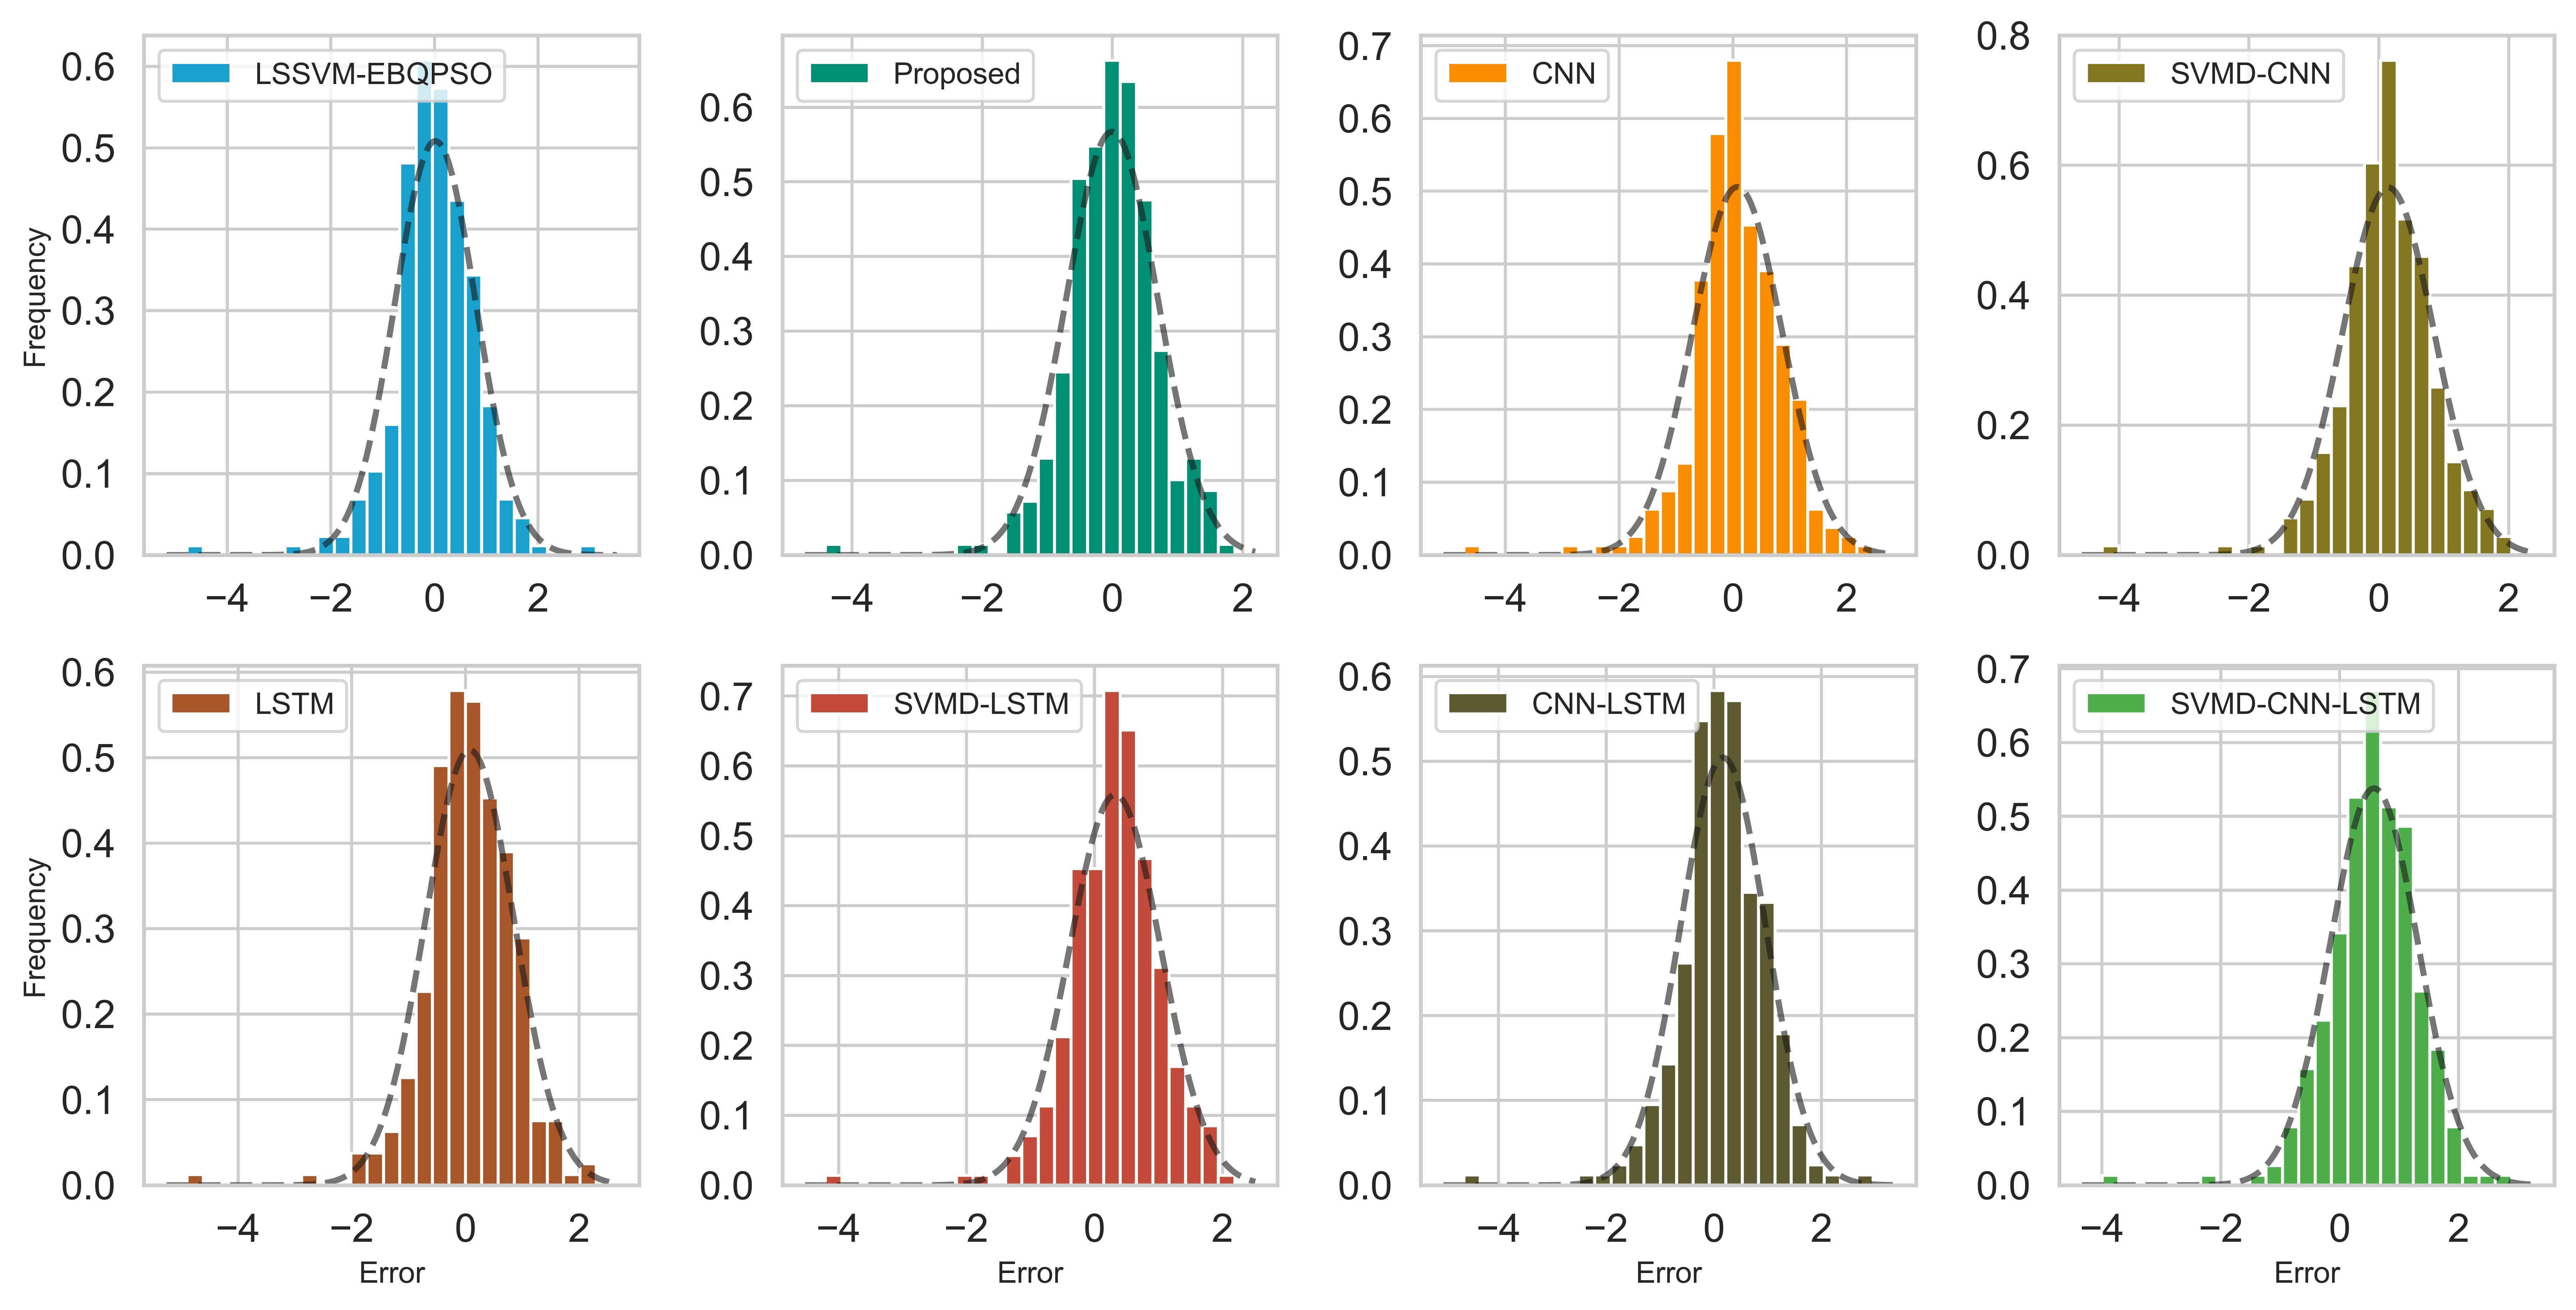

In [66]:
plot_error_hist(errors, colors, d=300)

In [204]:
file = open('ds1_all_errors', 'ab')
pickle.dump(errors, file)
file.close()

In [217]:
import matplotlib as mpl

lbs = ['LSSVM', 'EBQPSO-LSSVM', 'BP-NN', 'LSTM']
sns.set(style="white", palette="muted", color_codes=True)
sns.despine(left=True)

def plot_error_box(errors, d=100):
    bins=25
    fig, axs = plt.subplots(2, 4, figsize=(12, 6), dpi=d)
    fig.tight_layout()
    mpl.rcParams['xtick.labelsize'] = 8
    mpl.rcParams['ytick.labelsize'] = 8 
    for i in range(len(models)):
        row = i // 4
        col = i % 4
        axs[row][col].boxplot(errors[i], color=colors[i])
        if col==0:
            axs[row][col].set_ylabel("Error", fontsize=10)
        axs[row][col].set_xlabel(models[i], fontsize=10)


<Figure size 640x480 with 0 Axes>

In [67]:
errors_dict = {}
for i, error in enumerate(errors):
    errors_dict[models[i]] = error

In [68]:
df_errors = pd.DataFrame(errors_dict)

In [69]:
df_errors

LSSVM-EBQPSO  Proposed       CNN  SVMD-CNN      LSTM  SVMD-LSTM  \
0       -0.440158 -0.839718 -0.717023 -0.551374 -0.459765  -0.179561   
1        0.940786  0.750953  1.065678  0.956903  1.002449   1.410191   
2        0.587278  0.305341  0.467183  0.588241  0.668843   0.987279   
3       -0.265991 -0.502607 -0.502460 -0.240619 -0.288523   0.136643   
4       -0.104602 -0.048307  0.029169  0.199989 -0.008445   0.595511   
..            ...       ...       ...       ...       ...        ...   
271     -0.135060 -0.043515  0.018308  0.132683  0.054256   0.214599   
272      0.679218  0.766823  0.790950  0.884989  0.803002   1.002610   
273      0.090659  0.286057  0.186445  0.495468  0.281994   0.540522   
274     -0.969134 -0.812947 -0.906897 -0.724835 -0.903291  -0.587236   
275     -0.886512 -0.717615 -0.698140 -0.513613 -0.866078  -0.456412   

     CNN-LSTM  SVMD-CNN-LSTM  
0   -0.171422       0.233178  
1    1.368670       1.711382  
2    0.870451       1.366037  
3   -0.015839       0.558545  
4    0.271661       0.971845  
..        ...            ...  
271  0.054251       0.481769  
272  0.878228       1.272621  
273  0.250435       0.844622  
274 -0.808778      -0.294831  
275 -0.699510      -0.207839  

[276 rows x 8 columns]

In [88]:
import plotly.express as px
import plotly.io as pio

fig = px.box(df_errors)
fig.update_layout(
    xaxis_title="Model",
    yaxis_title="Residual error",
)
fig.update_xaxes(title_font_size=12, tickfont=dict(size=12))
fig.update_yaxes(title_font_size=12, tickfont=dict(size=12))
# fig.write_image('figures/ds1_error_box.png')
pio.write_image(fig, 'figures/ds1_error_box.png',scale=3, width=1080, height=540)
fig.show()

In [17]:
all_pred_data_1 = get_data('all_pred_data_1')

In [20]:
all_pred_data_1.keys()

dict_keys(['Actual', 'LSSVM-EBQPSO', 'Proposed', 'CNN', 'SVMD-CNN', 'LSTM', 'SVMD-LSTM', 'CNN-LSTM', 'SVMD-CNN-LSTM'])

In [21]:
df_all = pd.DataFrame(all_pred_data_1)

In [22]:
df_all

Actual  LSSVM-EBQPSO   Proposed        CNN   SVMD-CNN       LSTM  \
0    10.9424     11.382558  11.782118  11.659423  11.493774  11.402165   
1    11.7441     10.803314  10.993147  10.678422  10.787197  10.741651   
2    11.8305     11.243222  11.525159  11.363317  11.242259  11.161656   
3    11.0137     11.279691  11.516307  11.516160  11.254319  11.302222   
4    10.7578     10.862402  10.806107  10.728631  10.557811  10.766245   
..       ...           ...        ...        ...        ...        ...   
271   9.7317      9.866760   9.775215   9.713392   9.599017   9.677444   
272  10.4091      9.729881   9.642276   9.618150   9.524111   9.606097   
273  10.3851     10.294441  10.099043  10.198655   9.889632  10.103106   
274   9.3026     10.271734  10.115547  10.209496  10.027435  10.205891   
275   8.4713      9.357812   9.188916   9.169440   8.984914   9.337379   

     SVMD-LSTM   CNN-LSTM  SVMD-CNN-LSTM  
0    11.121961  11.113822      10.709222  
1    10.333908  10.375429      10.032717  
2    10.843221  10.960049      10.464462  
3    10.877057  11.029538      10.455155  
4    10.162290  10.486139       9.785955  
..         ...        ...            ...  
271   9.517101   9.677449       9.249931  
272   9.406490   9.530871       9.136479  
273   9.844578  10.134665       9.540478  
274   9.889836  10.111378       9.597431  
275   8.927712   9.170810       8.679140  

[276 rows x 9 columns]

In [39]:
list(all_pred_data_1.keys()).index('Proposed')

2

In [54]:
def plot_forecast(name, dpi=300):
    plt.figure(figsize=(12, 4), dpi=dpi)
    df_all['Actual'].plot(label='Actual', color='#EF0307', alpha=.6)
    df_all[name].plot(label=name, color=colors[list(all_pred_data_1.keys()).index(name)-1])
    plt.grid(axis='x')
    plt.xlabel('Time step (20 min.)')
    plt.ylabel('Wind speed (m/s)')
    plt.legend(ncols=2, loc='best')

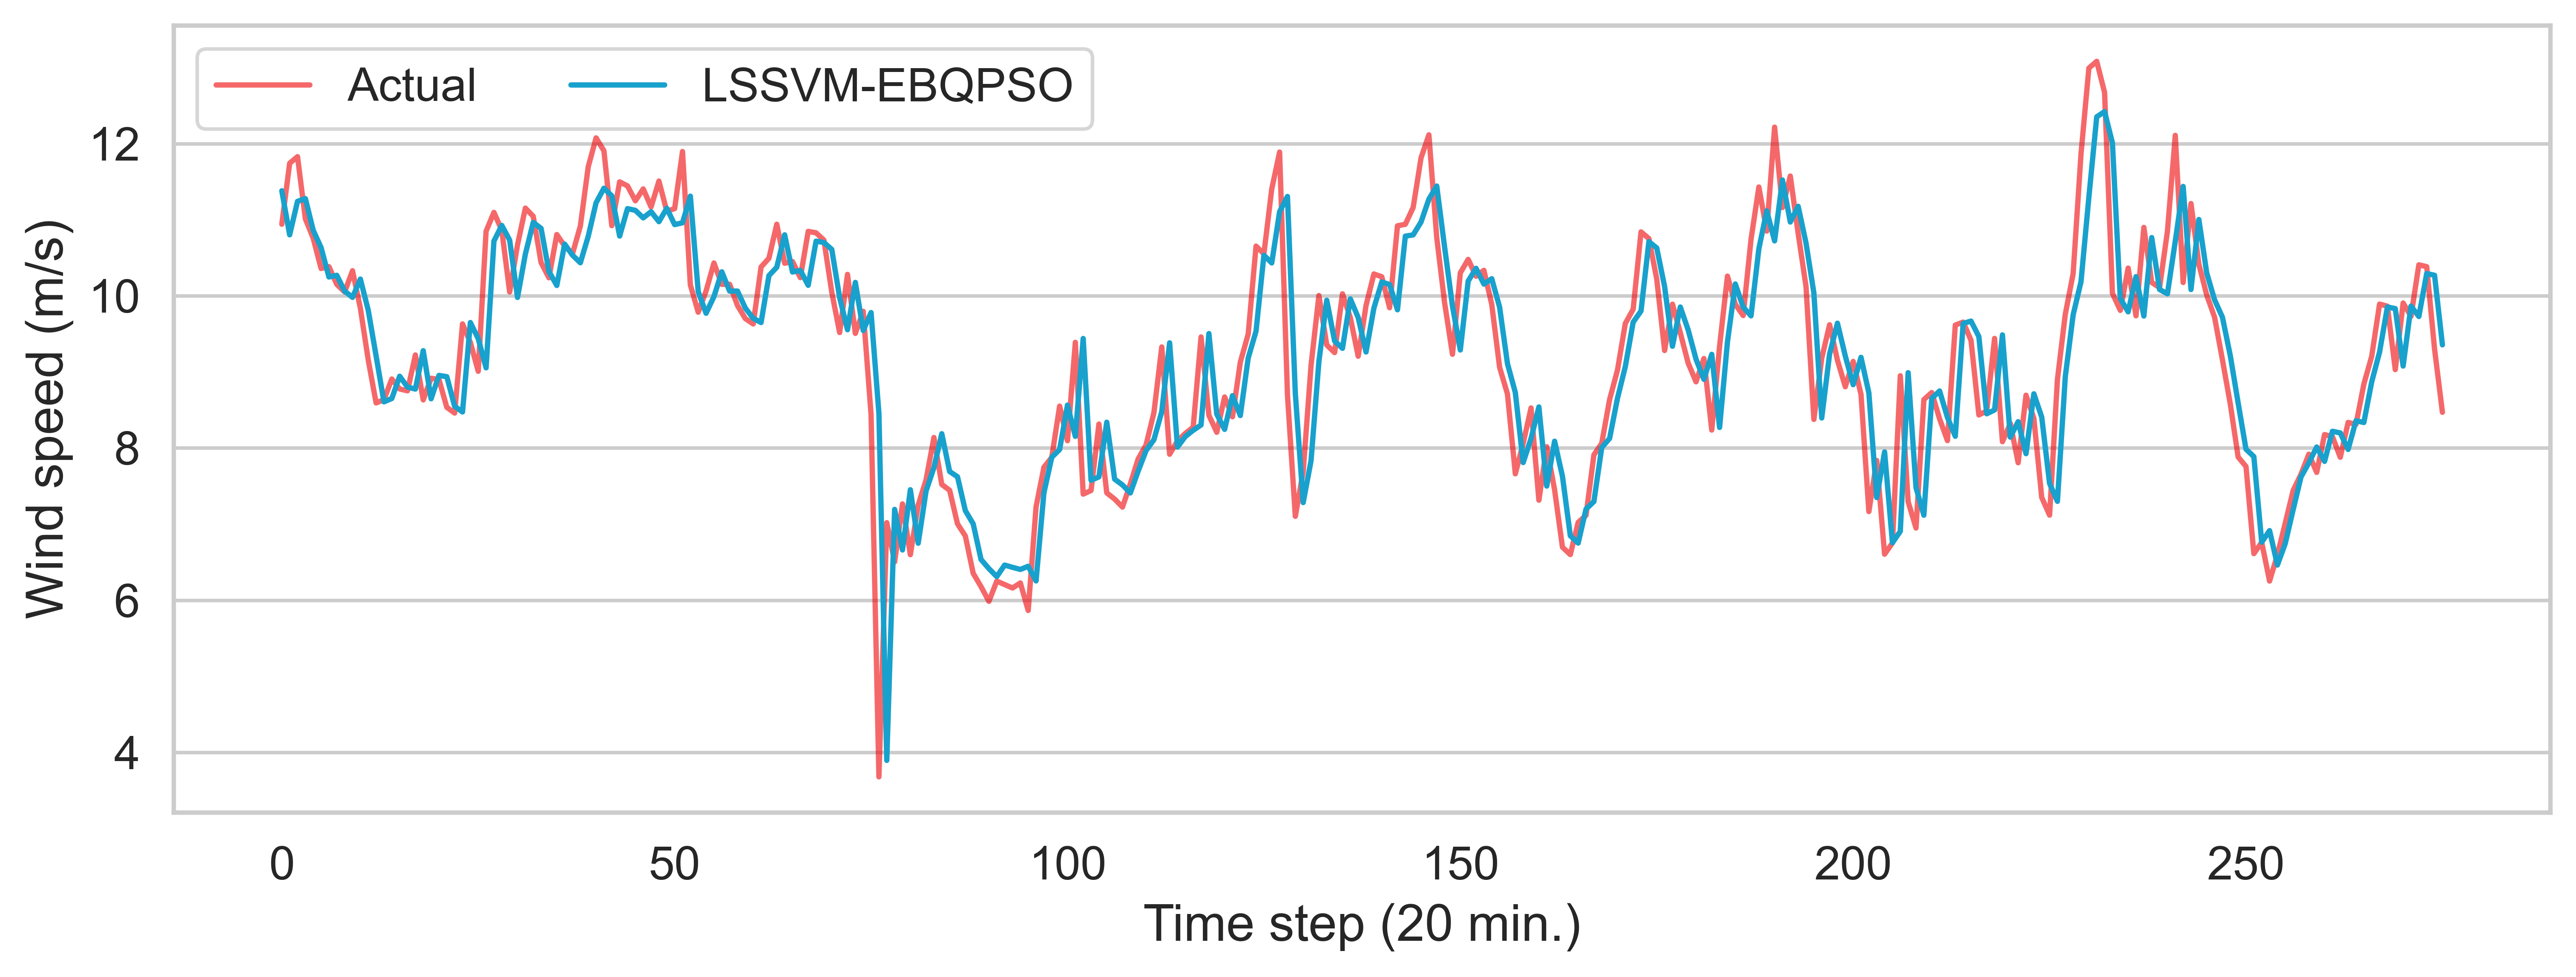

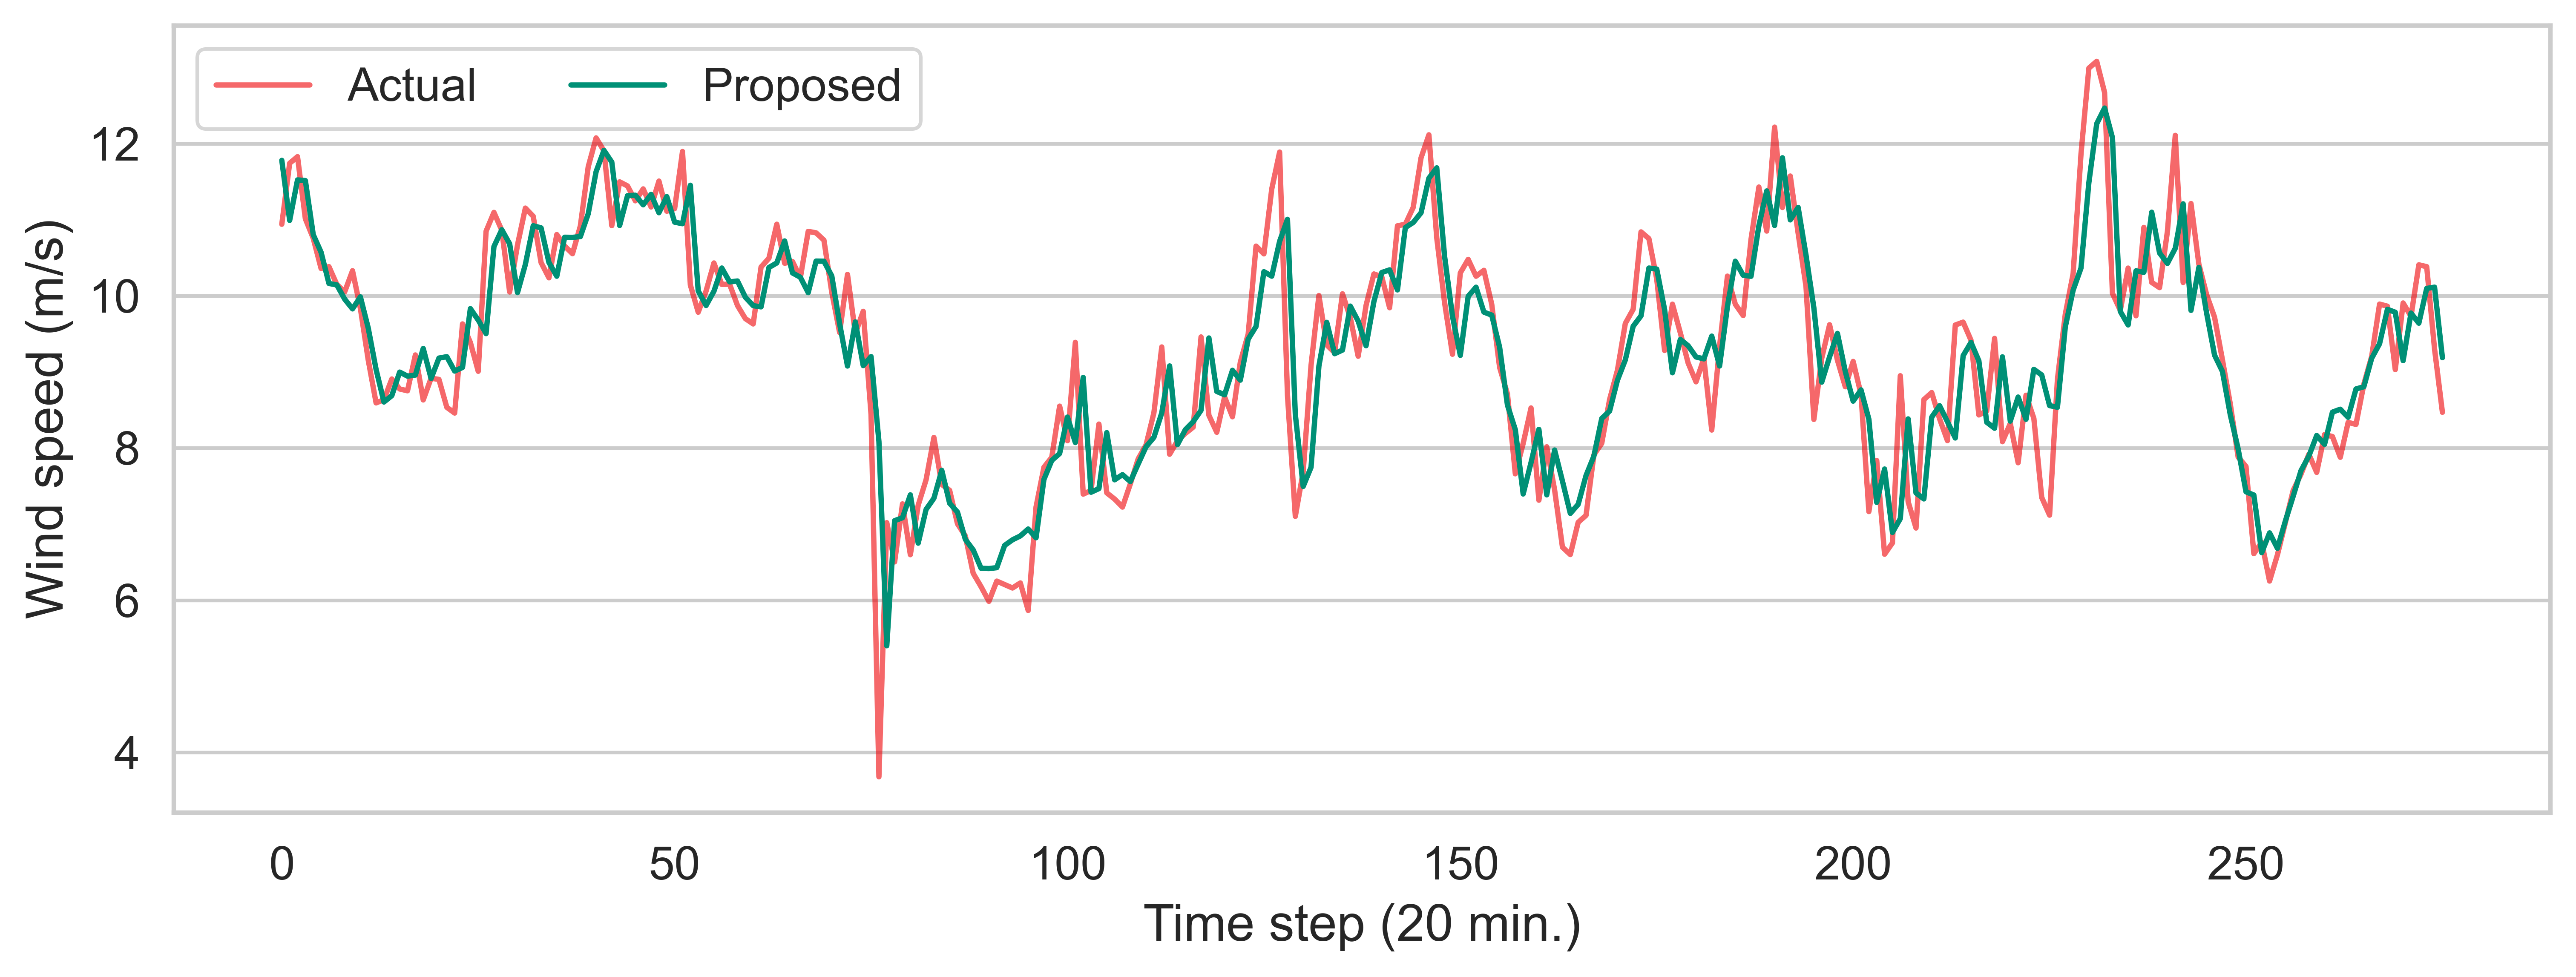

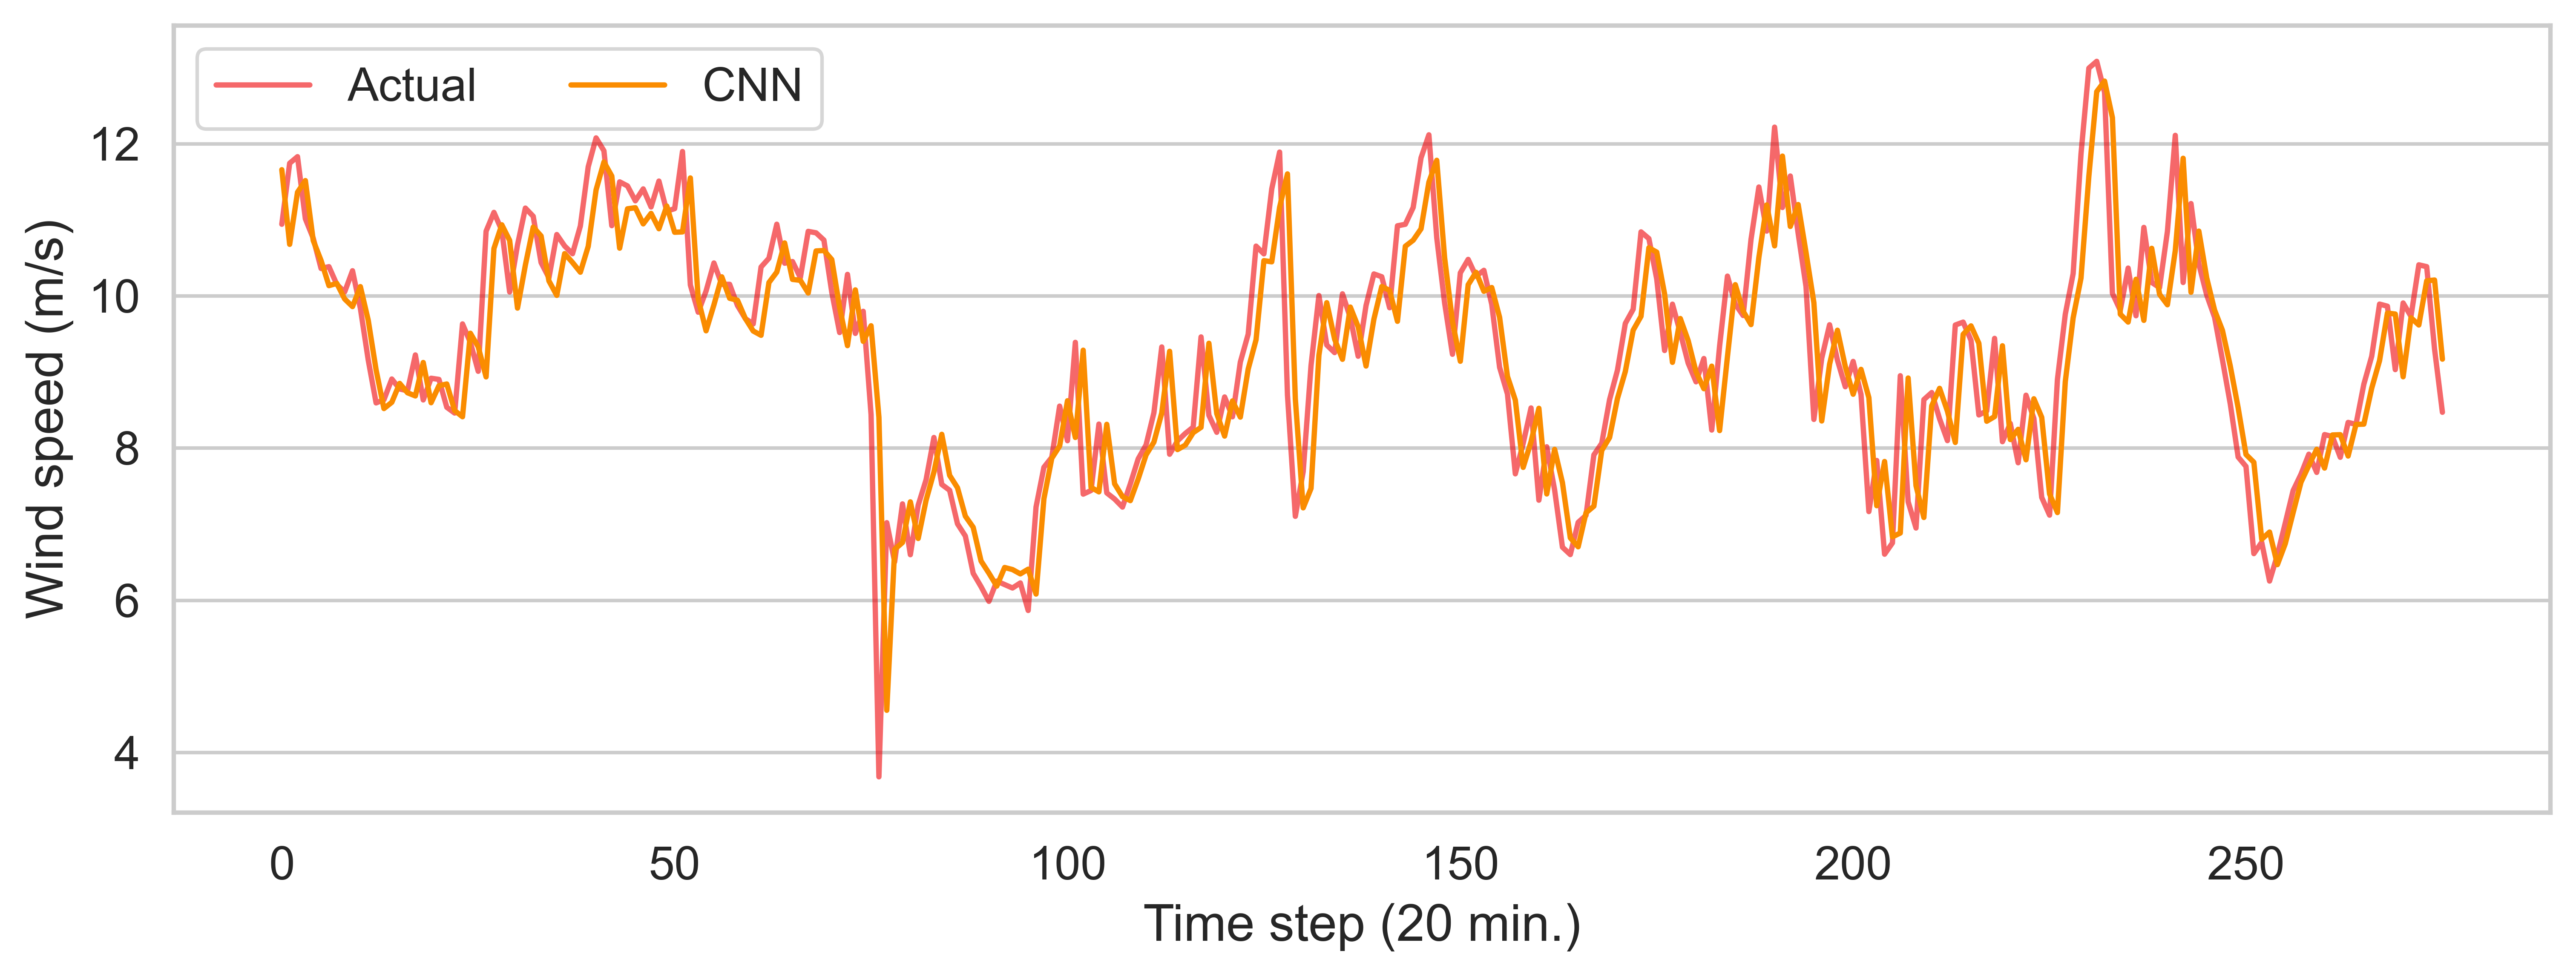

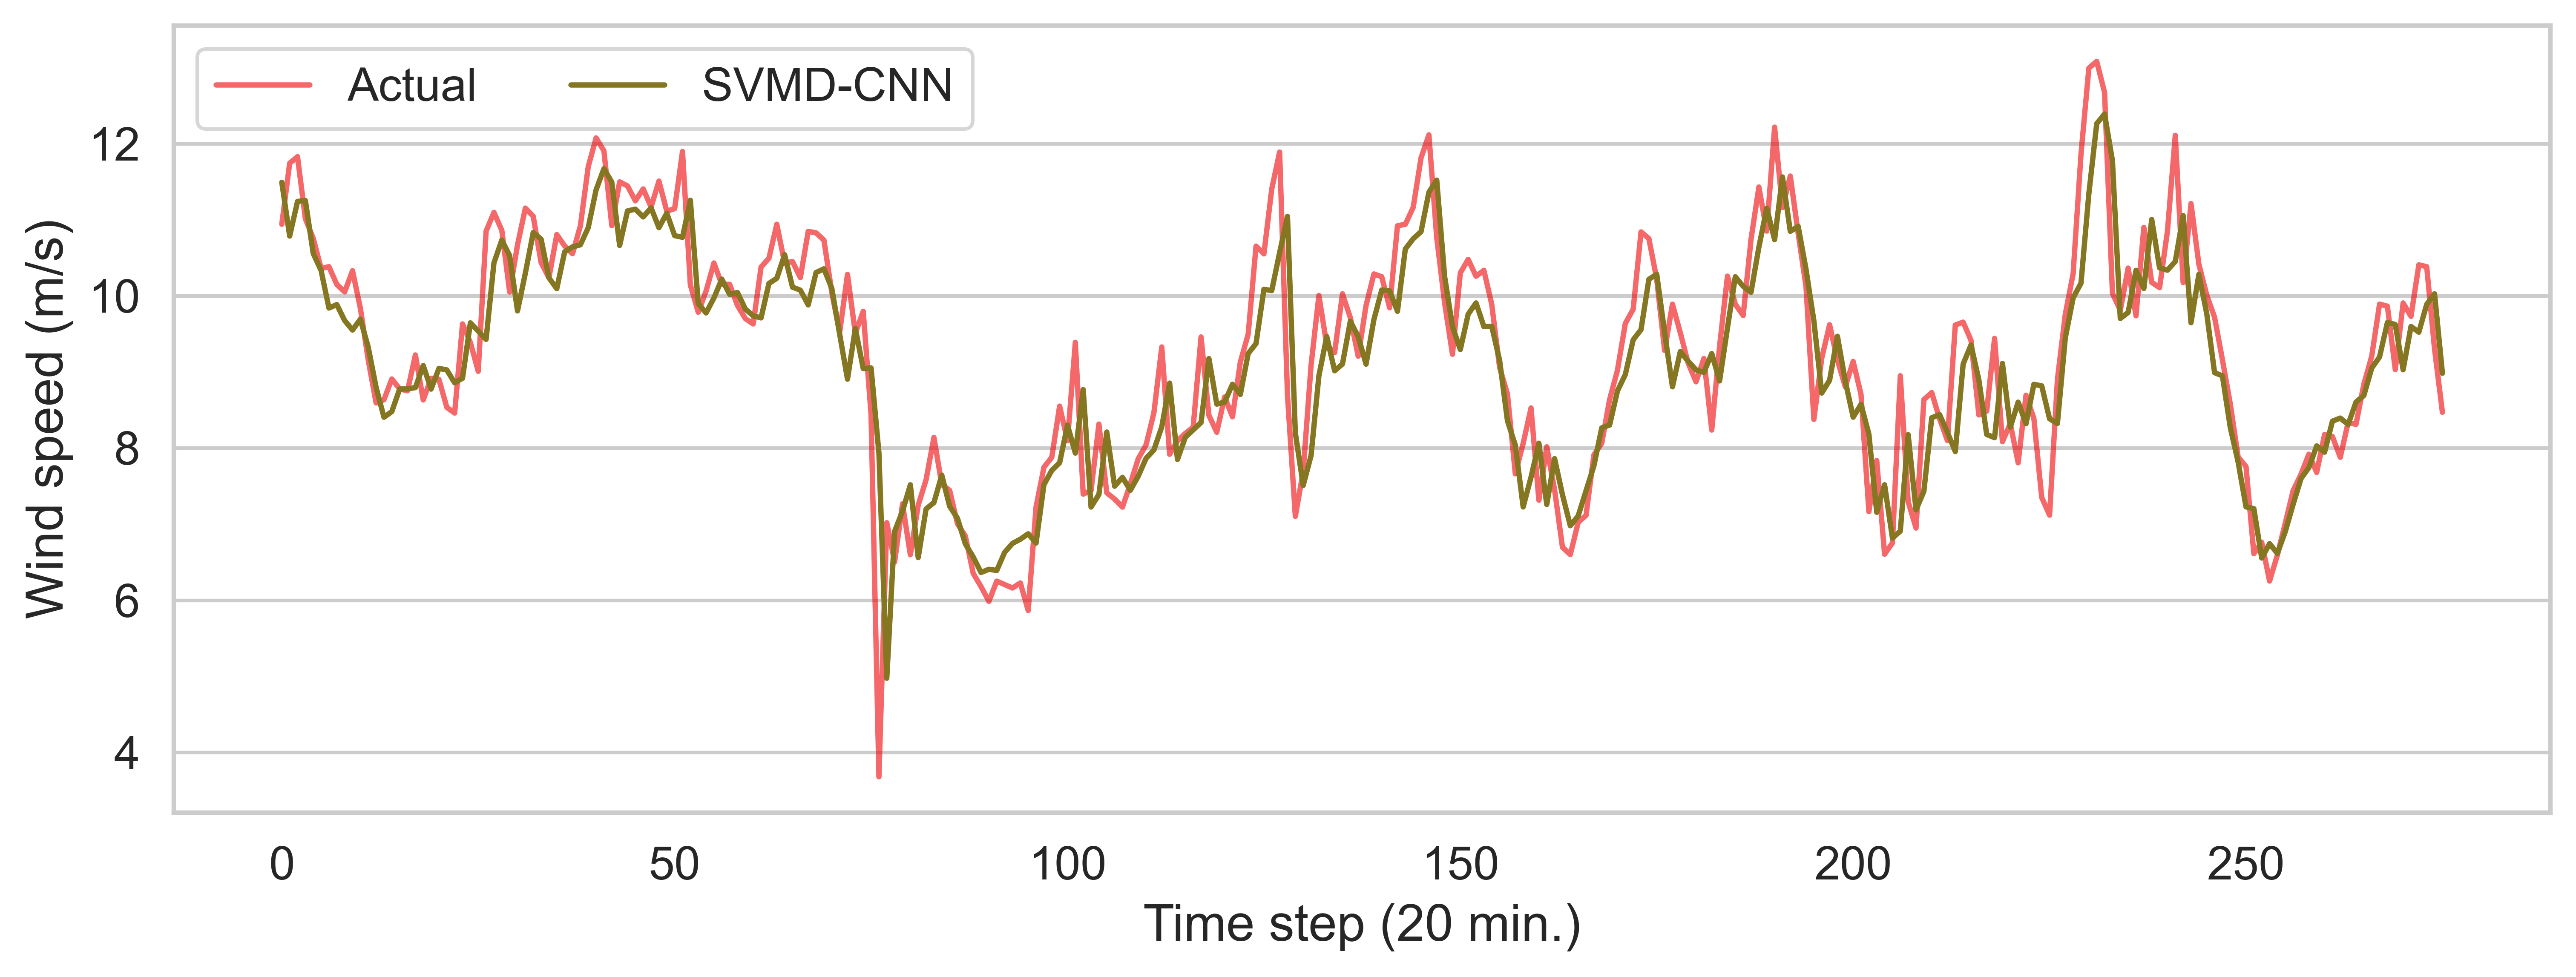

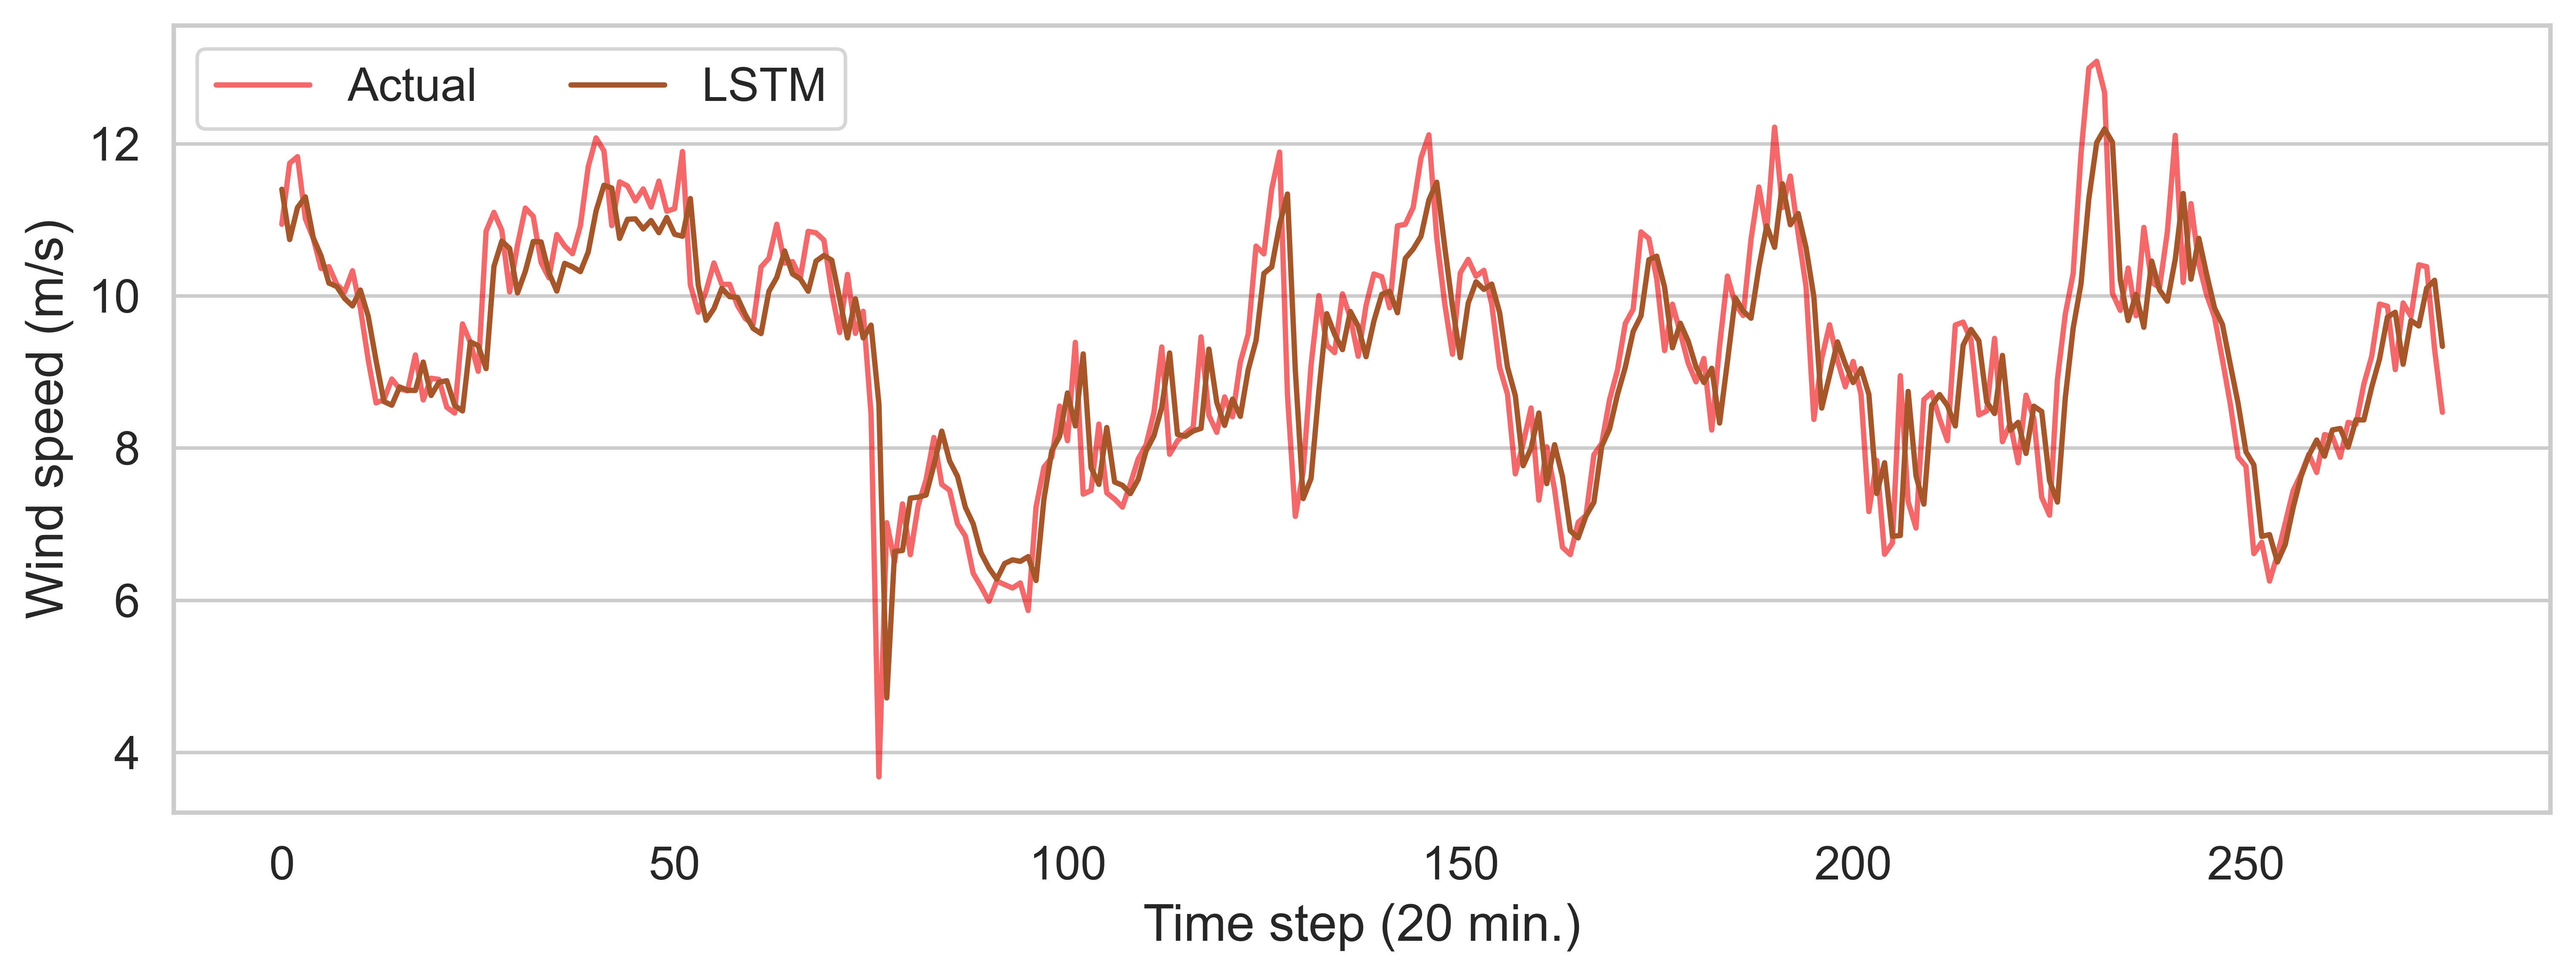

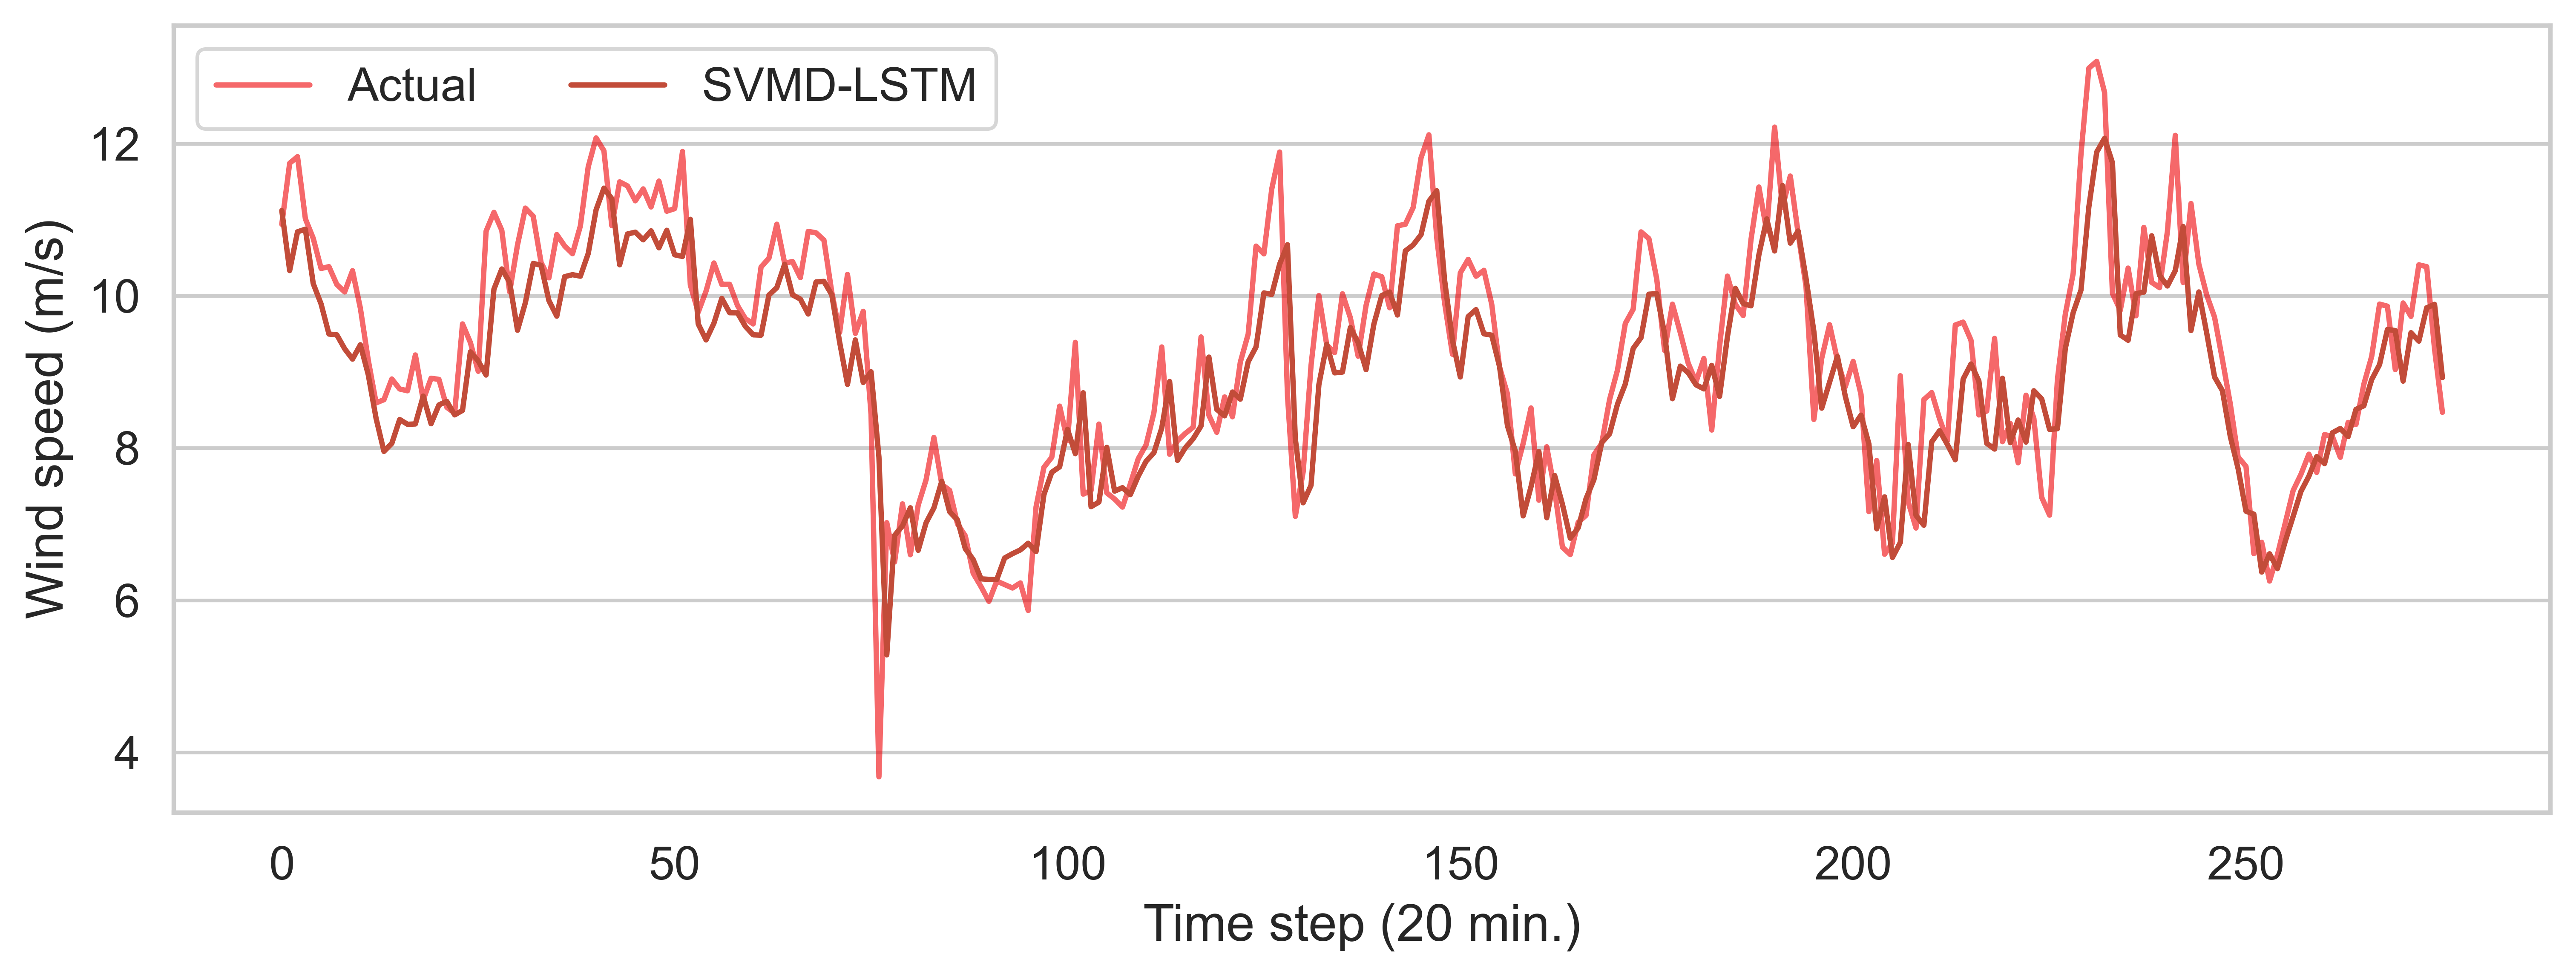

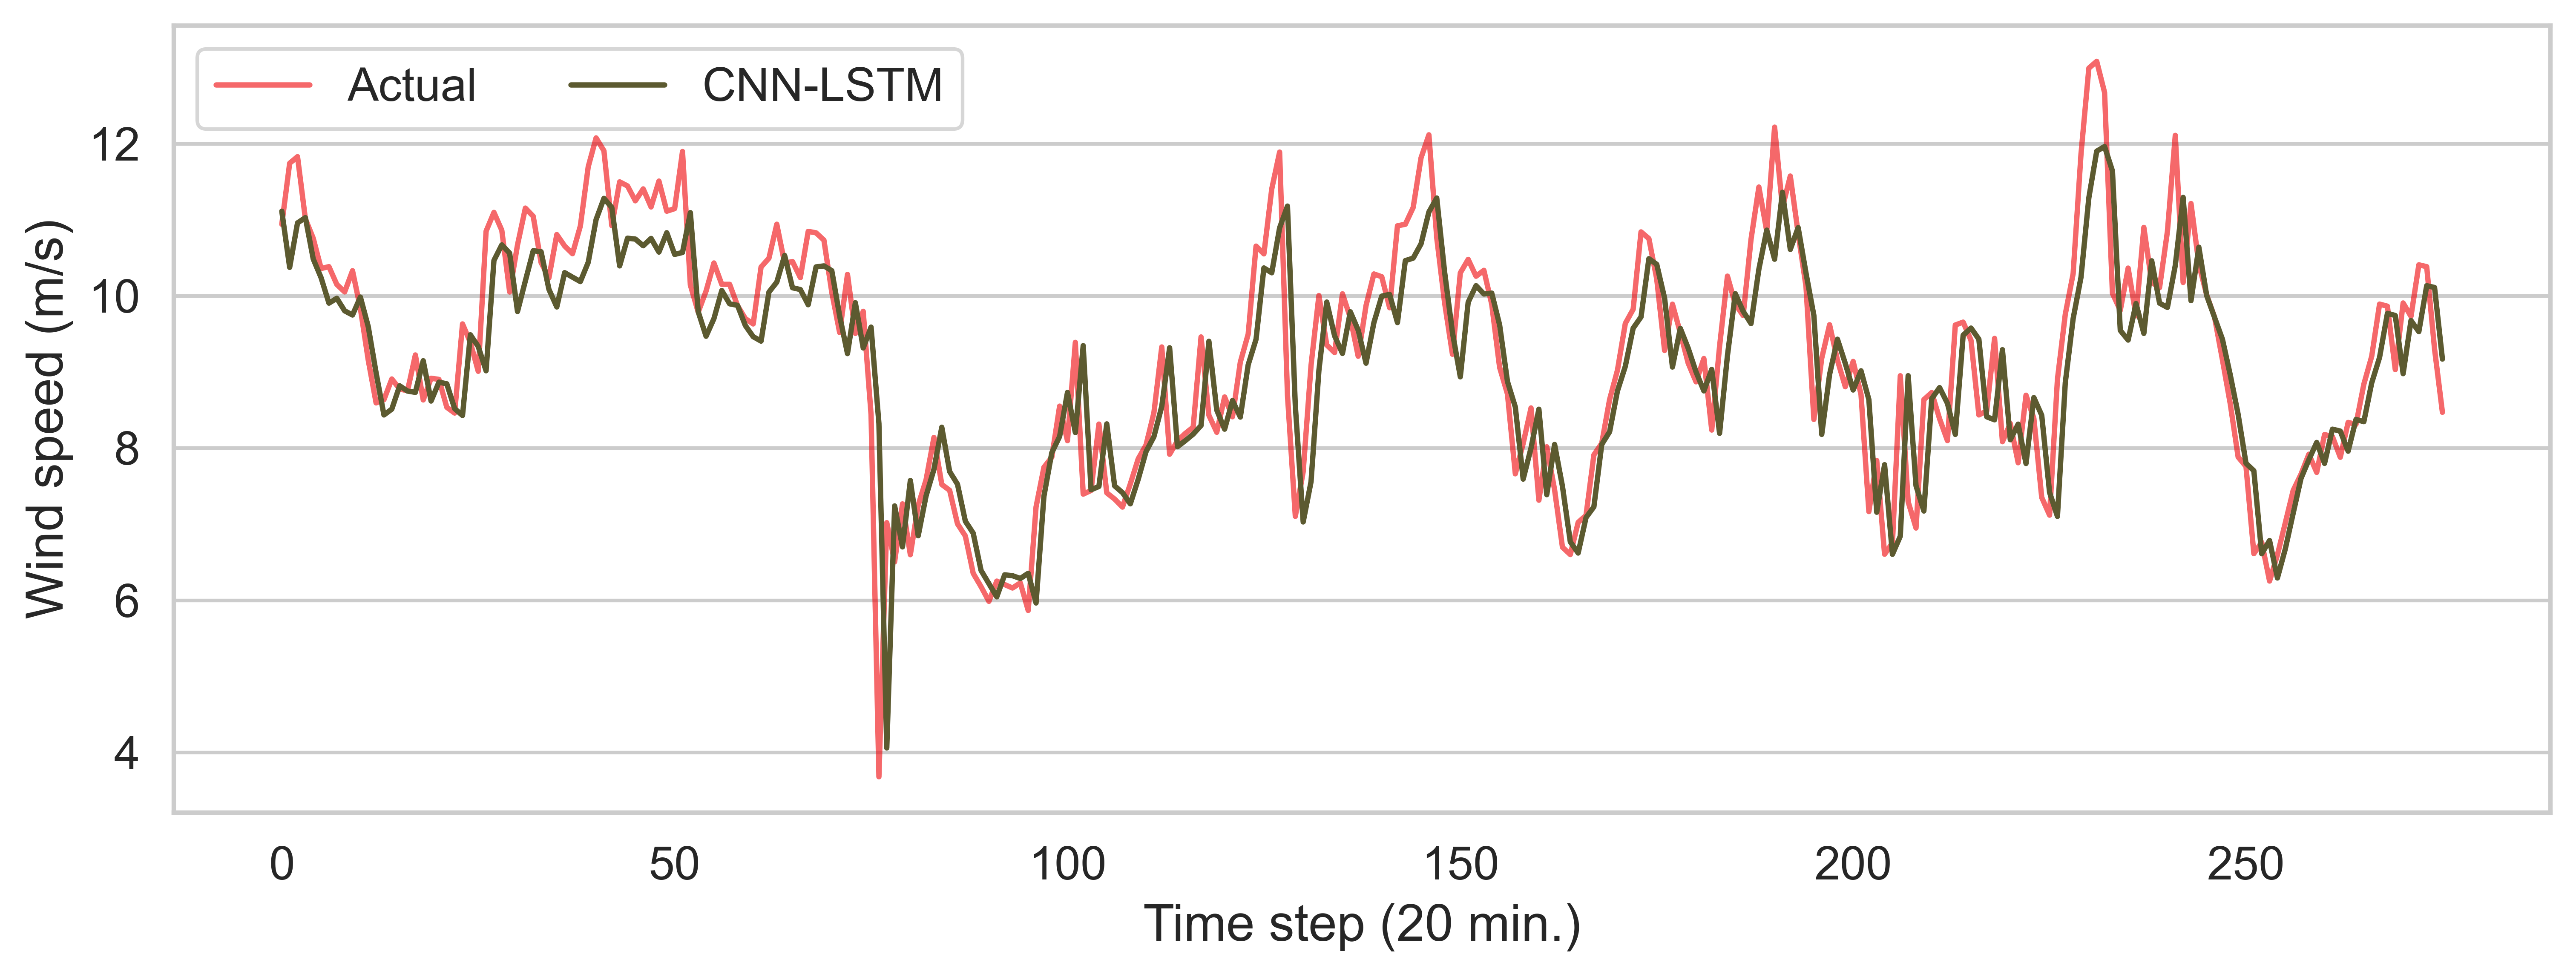

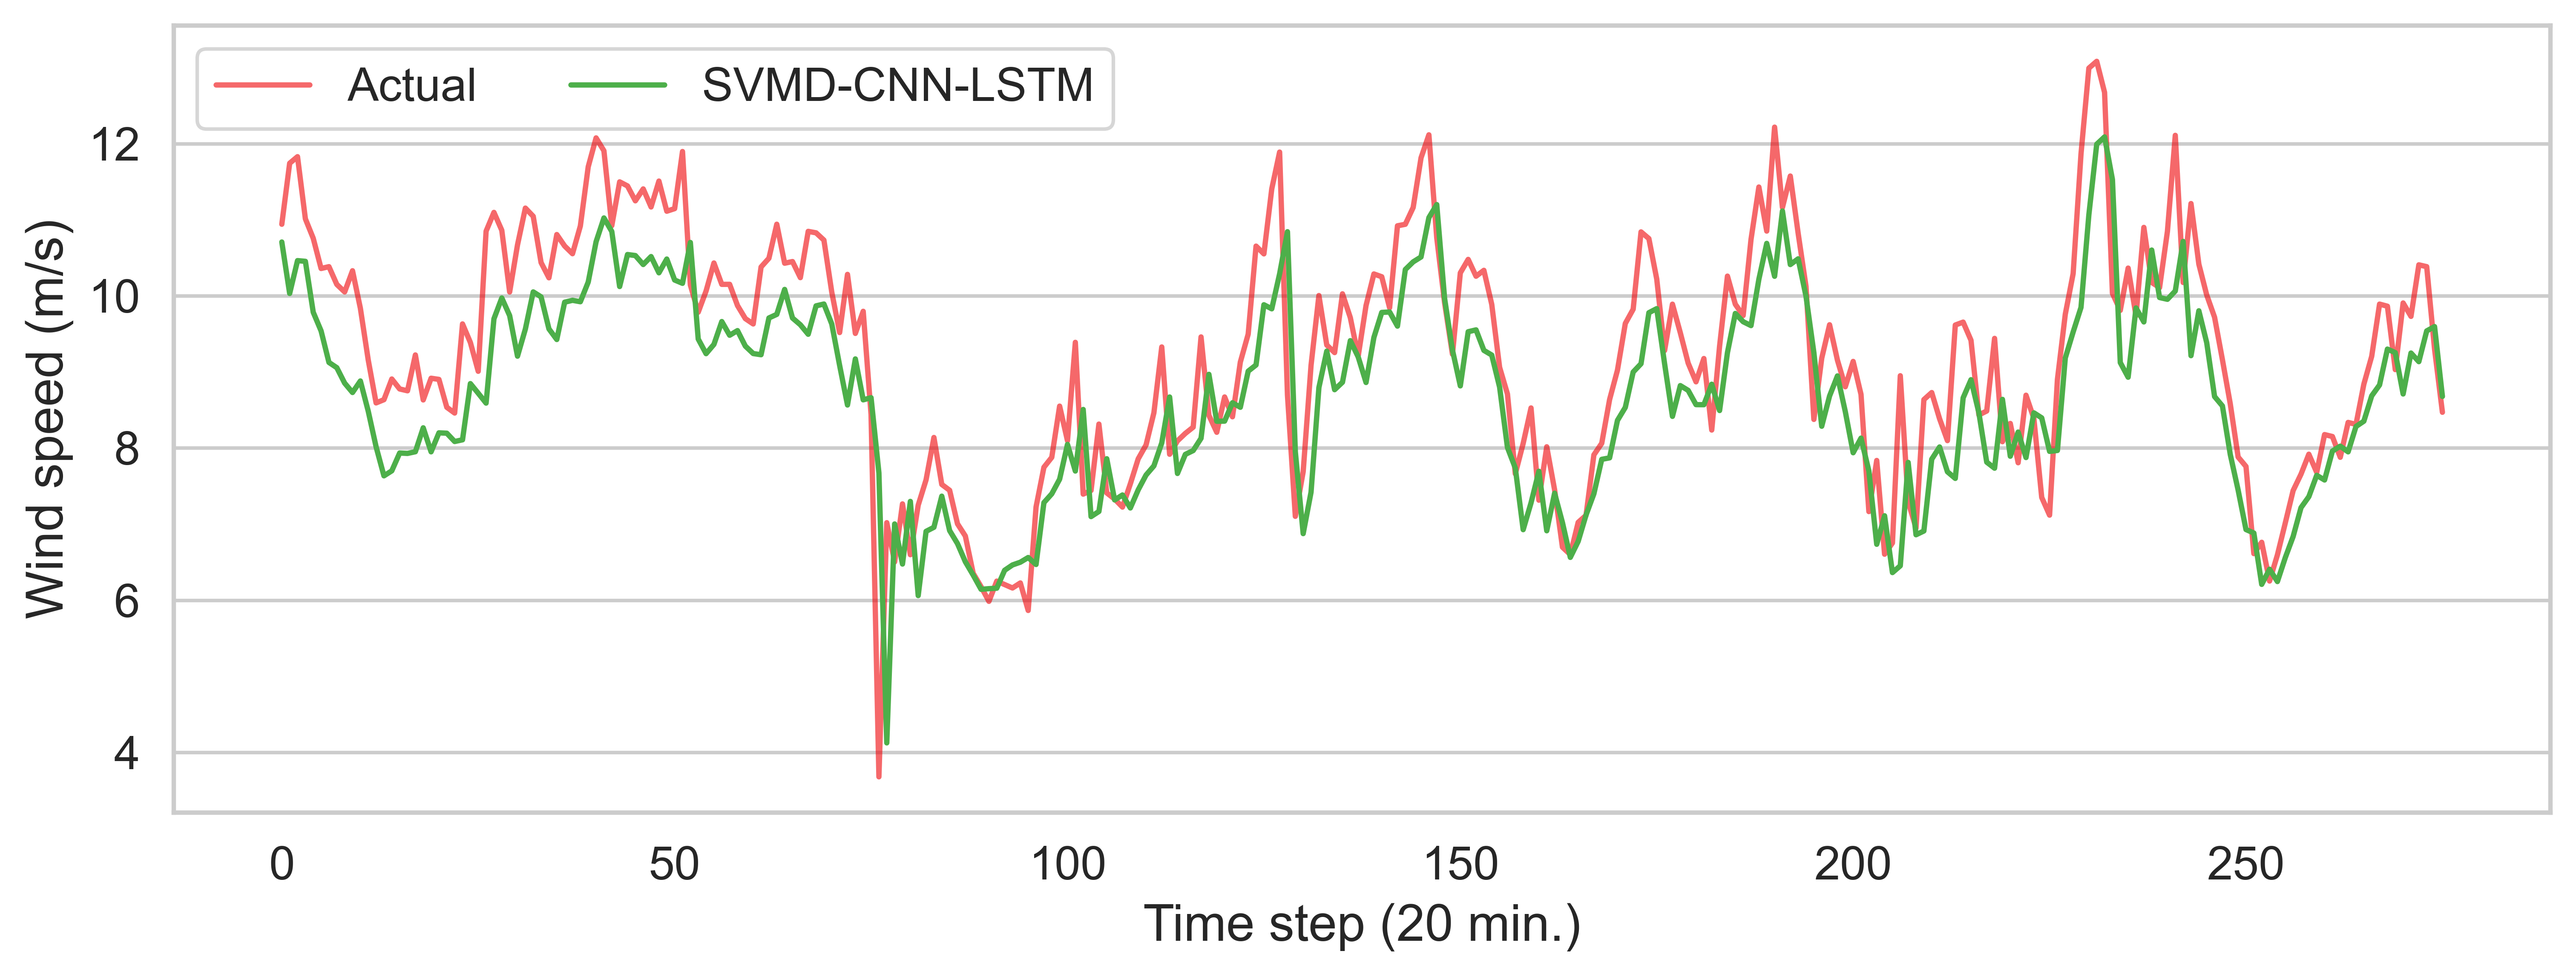

In [56]:
for i in range(len(colors)):
    plot_forecast(list(all_pred_data_1.keys())[i+1])
